In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/covid_world_weekly_trend.csv')

# 가설 1. 
인구가 천만명 이상인 국가에서는 코로나가 감소세를 보일 것이다.  
유의미한 값을 골라내기 위해 확진자 수가 100 이상인 국가들을 대상으로 진행.

## 인구수 천만명 이상 나라들 조사

In [28]:
covid = data

print(covid.shape)
covid.head()

(212, 10)


,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,308,291,6.0,8.0,5,6,-17,0.1,40483797
1,Albania,236,471,-50.0,82.0,2,0,200,0.7,2872219
2,Algeria,31,48,-35.0,0.7,0,0,0,0.0,45256195
3,Andorra,304,311,-2.0,3923.0,0,0,0,0.0,77484
4,Angola,0,56,-100.0,0.0,0,0,0,0.0,34679470


In [29]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country, Other                    212 non-null    object 
 1   Cases in the last 7 days          212 non-null    int64  
 2   Cases in the preceding 7 days     212 non-null    int64  
 3   Weekly Case % Change              212 non-null    float64
 4   Cases in the last 7 days/1M pop   212 non-null    float64
 5   Deaths in the last 7 days         212 non-null    int64  
 6   Deaths in the preceding 7 days    212 non-null    int64  
 7   Weekly Death % Change             212 non-null    int64  
 8   Deaths in the last 7 days/1M pop  212 non-null    float64
 9   Population                        212 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.7+ KB


In [30]:
# 결측치 확인
covid.isnull().sum()

Country, Other                      0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceding 7 days      0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

In [31]:
# 사용할 열만 추출
covid = covid.loc[:, ['Country, Other', 'Cases in the last 7 days', 'Cases in the preceding 7 days', 'Weekly Case % Change', 'Cases in the last 7 days/1M pop', 'Population']]
covid.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Population
0,Afghanistan,308,291,6.0,8.0,40483797
1,Albania,236,471,-50.0,82.0,2872219
2,Algeria,31,48,-35.0,0.7,45256195
3,Andorra,304,311,-2.0,3923.0,77484
4,Angola,0,56,-100.0,0.0,34679470


In [32]:
# 열 이름 변경
covid.rename(columns={'Country, Other':'country', 'Cases in the last 7 days': 'this week', 'Cases in the preceding 7 days': 'last week', 'Weekly Case % Change': 'weekly percentage', 'Cases in the last 7 days/1M pop': '7days/1M', 'Population':'population'}, inplace=True)
covid.head()

,country,this week,last week,weekly percentage,7days/1M,population
0,Afghanistan,308,291,6.0,8.0,40483797
1,Albania,236,471,-50.0,82.0,2872219
2,Algeria,31,48,-35.0,0.7,45256195
3,Andorra,304,311,-2.0,3923.0,77484
4,Angola,0,56,-100.0,0.0,34679470


In [33]:
# 인구수가 천만명 이상인 국가들 추출
covid = covid[covid['population'] >= 10000000 ]
covid.head()

,country,this week,last week,weekly percentage,7days/1M,population
0,Afghanistan,308,291,6.0,8.0,40483797
2,Algeria,31,48,-35.0,0.7,45256195
4,Angola,0,56,-100.0,0.0,34679470
7,Argentina,10877,13164,-17.0,237.0,45931949
10,Australia,367940,399137,-8.0,14138.0,26025040


In [36]:
# 확진자 수가 0 ~ 99인 국가들 제거, 인덱스 새로 설정
covid = covid[(covid['this week'] > 99) & (covid['last week'] > 99)].reset_index(drop=True)
covid.head()

,country,this week,last week,weekly percentage,7days/1M,population
0,Afghanistan,308,291,6.0,8.0,40483797
1,Argentina,10877,13164,-17.0,237.0,45931949
2,Australia,367940,399137,-8.0,14138.0,26025040
3,Azerbaijan,186,289,-36.0,18.0,10301401
4,Bangladesh,264,435,-39.0,2.0,167601817


In [37]:
len(covid['country'])

63

### 막대그래프

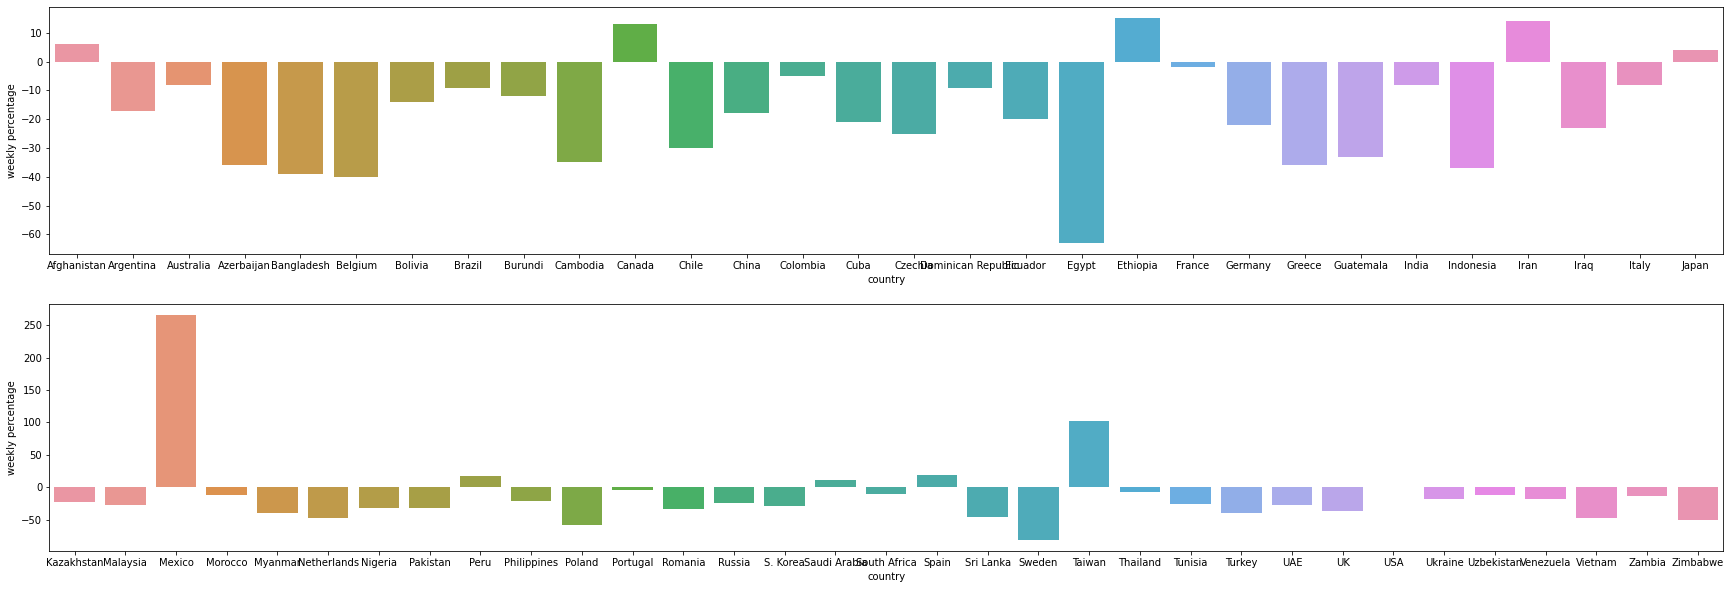

In [38]:
# 63개의 나라에 대해 weekly percentage를 그래프화
# 양수이면 코로나 확진자 증가, 음수이면 코로나 확진자 감소
# 많은 나라들이 감소하는 추세를 보임

plt.figure(figsize=(30, 10))
plt.subplot(211)
sns.barplot(data=covid[:30], x='country', y='weekly percentage')
plt.subplot(212)
sns.barplot(data=covid[30:], x='country', y='weekly percentage')
plt.show()

### 확진자 증가/감소를 True/False로 두고 파이차트 그리기

In [39]:
covid['decrease'] = covid['weekly percentage'] < 0
covid.head()

,country,this week,last week,weekly percentage,7days/1M,population,decrease
0,Afghanistan,308,291,6.0,8.0,40483797,False
1,Argentina,10877,13164,-17.0,237.0,45931949,True
2,Australia,367940,399137,-8.0,14138.0,26025040,True
3,Azerbaijan,186,289,-36.0,18.0,10301401,True
4,Bangladesh,264,435,-39.0,2.0,167601817,True


In [40]:
total = len(covid)
dec_total = len(covid[covid['decrease']==True]) / total * 100
inc_total = len(covid[covid['decrease']==False]) / total * 100

print(dec_total, inc_total)

82.53968253968253 17.46031746031746


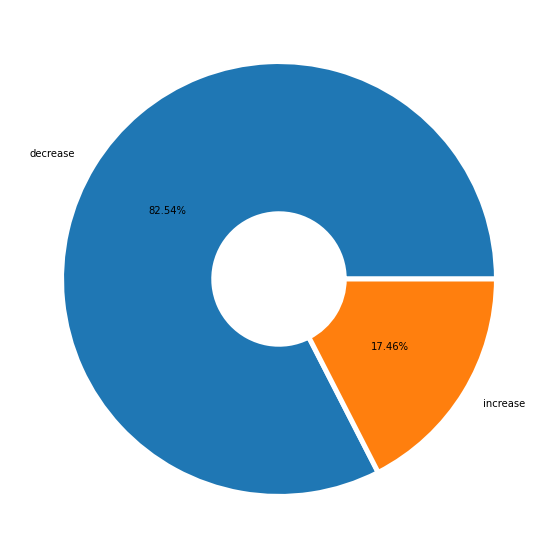

In [41]:
# 확진자가 감소하는 나라가 83%이다.
# 따라서 코로나는 감소하는 추세임을 알 수 있다.

ratio = [dec_total, inc_total]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=['decrease', 'increase'], autopct='%.2f%%', wedgeprops=wedgeprops)
plt.show()

## 미슐랭 가이드에 있는 나라만 조사

### 막대그래프

In [42]:
# 미슐랭 가이드에 있는 나라 35국
michelinCountry = ['Germany', 'UK', 'Austria', 'China', 'Hong Kong','Spain', 'Japan', 
                   'S. Korea', 'Italy', 'USA', 'Sweden', 'Norway', 'Denmark', 'Singapore',
                   'Netherlands', 'Switzerland','France', 'Belgium', 'Ireland', 'Thailand', 'Portugal', 
                   'Greece', 'Slovenia','Luxembourg', 'Brazil', 'Malta', 'Andorra', 'San Marino', 
                   'Czechia','Iceland', 'Finland', 'Croatia', 'Hungary', 'Poland', 'Serbia']
len(michelinCountry)

35

In [43]:
# 똑같이 인구 천만명이 넘고 0 ~ 99명 이상의 확진자가 나온 나라 대상으로 조사

covid_michelin = covid[covid['country'].isin(michelinCountry)].reset_index(drop=True)
print(covid_michelin.shape)

covid_michelin.head()

(18, 7)


,country,this week,last week,weekly percentage,7days/1M,population,decrease
0,Belgium,51192,85192,-40.0,4383.0,11679161,True
1,Brazil,143800,157732,-9.0,668.0,215241599,True
2,China,9471,11570,-18.0,7.0,1449190382,True
3,Czechia,29480,39560,-25.0,2744.0,10744249,True
4,France,935108,952013,-2.0,14270.0,65529910,True


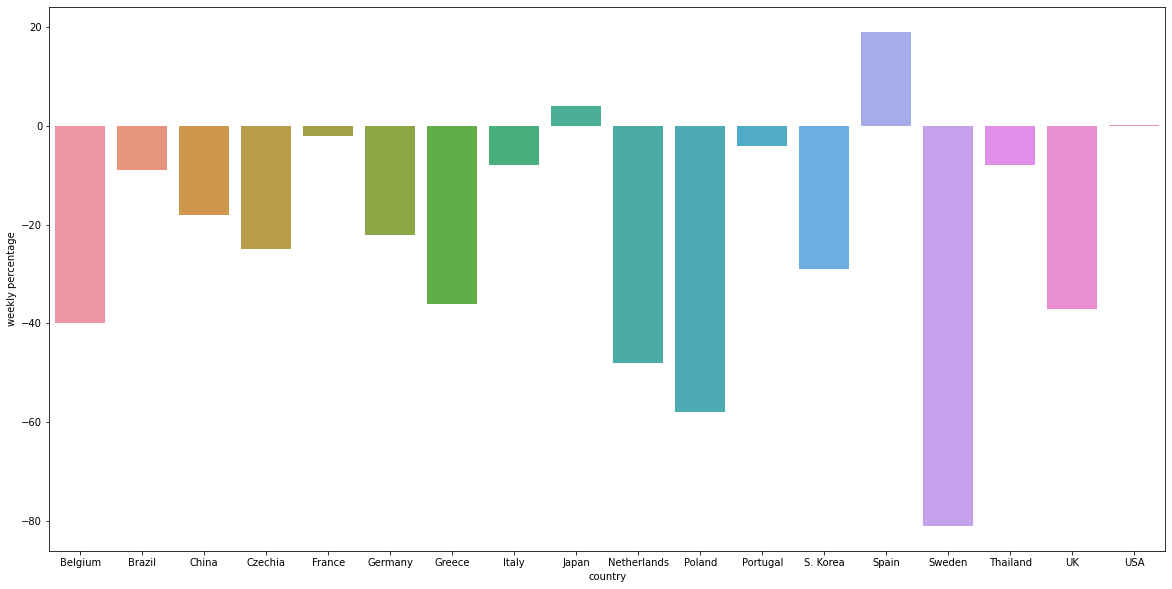

In [44]:
# 역시 확진자 수가 감소하는 추세임을 알 수 있다.
plt.figure(figsize=(20, 10))
sns.barplot(data=covid_michelin, x='country', y='weekly percentage')
plt.show()

### 확진자 증가/감소를 True/False로 두고 파이차트 그리기

In [45]:
total = len(covid_michelin)
dec_michelin = len(covid_michelin[covid_michelin['decrease']==True]) / total * 100
inc_michelin = len(covid_michelin[covid_michelin['decrease']==False]) / total * 100

print(dec_michelin, inc_michelin)

83.33333333333334 16.666666666666664


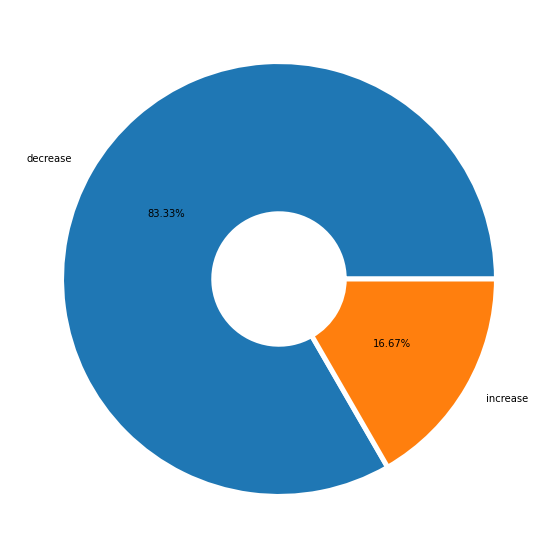

In [46]:
ratio = [dec_michelin, inc_michelin]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=['decrease', 'increase'],autopct='%.2f%%', wedgeprops=wedgeprops)
plt.show()